# Project for Applied Statistics as part of the higher diploma in Computer Science and Data Analytics 2024


This project will be looking at the [PlantGrowth R dataset](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html).  This is a collection of data from an experiment where plants were given two different treatment conditions (plus a control)and their yield was then compared. 

The tasks objectives of the project are below;

1. Download and save the dataset to your repository.

2. Describe the data set in your notebook.

3. Describe what a t-test is, how it works, and what the assumptions are.

4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


c:\Users\kolea\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Task 1
Download and save the dataset to your repository

In [3]:
df = pd.read_csv("Data/PlantGrowth.csv")  
df

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [4]:
# remove column rownames
df = df.drop(["rownames"], axis=1) 
df


,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl
5,4.61,ctrl
6,5.17,ctrl
7,4.53,ctrl
8,5.33,ctrl
9,5.14,ctrl


## Task 2

Describe the data set in your notebook.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  30 non-null     float64
 1   group   30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


We can see from the above that dataframe up of 30 samples taken from 3 different groups, Control (ctrl), Treatment 1 (trt1) and Treatment 2 (trt2). Next we will plot their weights to show the distribution.

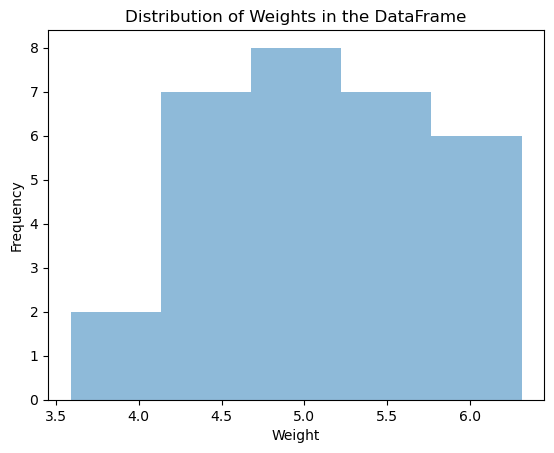

In [6]:
# Plot of the dataframe

#Square Root Rule for number of bins

b = int(np.sqrt(30))
b

plt.hist(df["weight"], b, alpha= 0.5, label="control")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Distribution of Weights in the DataFrame")
plt.show()

In [7]:
ctrl = df[df["group"]=="ctrl"]
ctrl.describe()

,weight
count,10.000000
mean,5.032000
std,0.583091
min,4.170000
25%,4.550000
50%,5.155000
75%,5.292500
max,6.110000


There are 10 samples from the control group and the average weight is 5.03 grams

In [8]:
trt1 = df[df["group"]=="trt1"]
trt1.describe()

,weight
count,10.000000
mean,4.661000
std,0.793676
min,3.590000
25%,4.207500
50%,4.550000
75%,4.870000
max,6.030000


There are 10 samples from the Treatment 1 group and the average weight is 4.66 grams

In [9]:
trt2 = df[df["group"]=="trt2"]
trt2.describe()

,weight
count,10.000000
mean,5.526000
std,0.442573
min,4.920000
25%,5.267500
50%,5.435000
75%,5.735000
max,6.310000


There are 10 samples from the Treatment 2 group and the average weight is 5.53 grams

In [10]:
ctrl

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl
5,4.61,ctrl
6,5.17,ctrl
7,4.53,ctrl
8,5.33,ctrl
9,5.14,ctrl


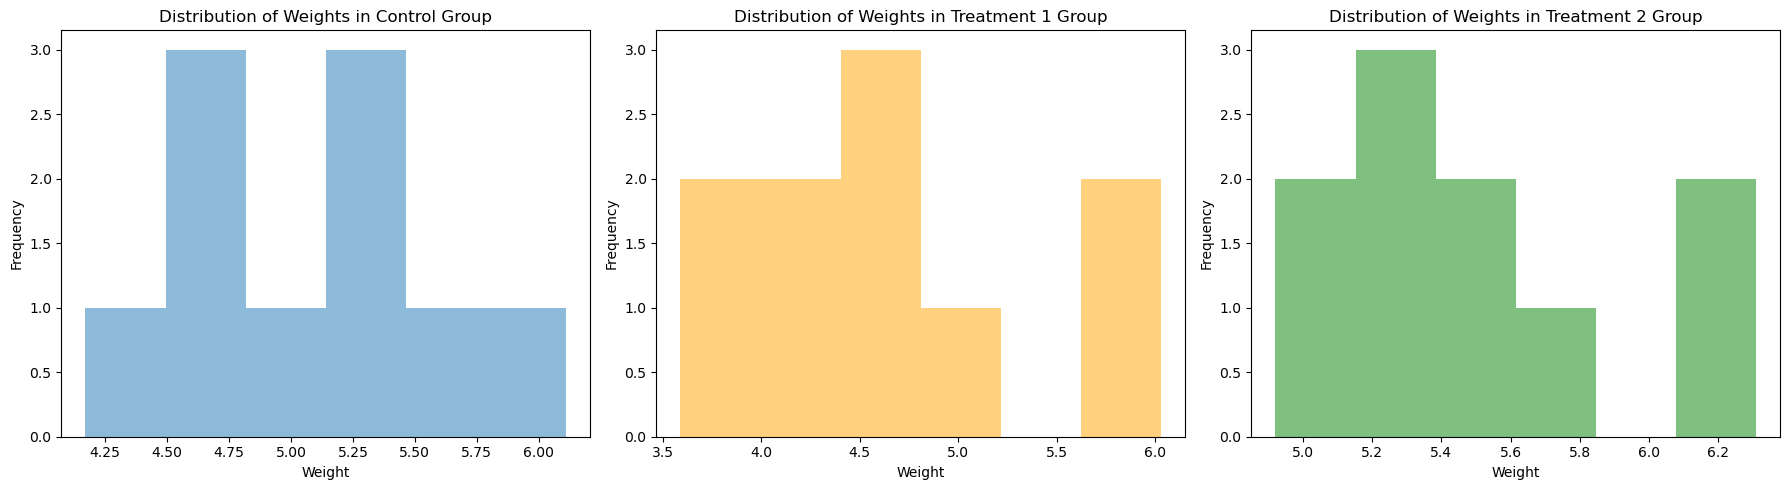

In [11]:
# Create plot for all 3 groups
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot the control group
axs[0].hist(ctrl['weight'], bins=6, alpha=0.5, label="control")
axs[0].set_xlabel("Weight")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Distribution of Weights in Control Group")

# Plot the treatment 1 group
axs[1].hist(trt1['weight'], bins=6, alpha=0.5, label="group1", color="orange")
axs[1].set_xlabel("Weight")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of Weights in Treatment 1 Group")

# Plot the group 2
axs[2].hist(trt2['weight'], bins=6, alpha=0.5, label="group2", color="green")
axs[2].set_xlabel("Weight")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of Weights in Treatment 2 Group")

# Show the plot
plt.tight_layout()
plt.show()

### Shapiro-Wilkes Test

The [Shapiro-Wilkes](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) test checks if an array fits a normal distribution. It will give 2 outputs, a statistic value and a p-value. 

The statistic value ranges from 0-1 and measures how closely your data fits the bell curve of a normal distribution. A value closer to 1 means your vales are closer to a normal distribution.

The null hypothesis in this case is that the data is normally distributed. The P-value gives a probability that your values could look like they do if they come from a normal distribution. Anything below .05 would be strong evidence that your values arent 'normal'.

In [12]:
# Checks if the Control group fits a normal distribution

ctrl_statistic, ctrl_p_values = stats.shapiro(ctrl['weight'])
ctrl_statistic
#ctrl_p_values

0.9566815495491028

In [13]:
print("The Shapiro Wilkes test has given a statistic value of {} for the control group. Any value close to 1 would give a bell curve distribution. This combined with a high p-value of {} would indicate it has a normal distribution.".format(ctrl_statistic, ctrl_p_values))

The Shapiro Wilkes test has given a statistic value of 0.9566815495491028 for the control group. Any value close to 1 would give a bell curve distribution. This combined with a high p-value of 0.7474744915962219 would indicate it has a normal distribution.


In [14]:
# Checks if the Treatment 1 group fits a normal distribution

trt1_statistic, trt1_p_values = stats.shapiro(trt1['weight'])
trt1_statistic
#trt2_p_values

0.9304108619689941

In [15]:
print("The test has given a statistic value of {} for the Treatment 1 group, indicating a bell curve distribution. The relatively high p-value of {} shows there is no reason to reject the null hypothesis.".format(trt1_statistic, trt1_p_values))

The test has given a statistic value of 0.9304108619689941 for the Treatment 1 group, indicating a bell curve distribution. The relatively high p-value of 0.451945960521698 shows there is no reason to reject the null hypothesis.


In [16]:
# Checks if the Treatment 1 group fits a normal distribution

trt2_statistic, trt2_p_values = stats.shapiro(trt2['weight'])
trt2_statistic
#trt2_p_values

0.941005289554596

In [17]:
print("Again the test has given a high statistic value of {} for the Treatment 2 group, indicating a normal distribution. The  high p-value of {} shows there is no reason to reject the null hypothesis.".format(trt2_statistic, trt2_p_values))

Again the test has given a high statistic value of 0.941005289554596 for the Treatment 2 group, indicating a normal distribution. The  high p-value of 0.5642533898353577 shows there is no reason to reject the null hypothesis.


From the above Shapiro tests, there is nothing to indicate any of the 3 groups don't follow a normal distribution. 

Next we will look at our groups distribution on a [strip plot](https://seaborn.pydata.org/generated/seaborn.stripplot.html).

c:\Users\kolea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kolea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kolea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='group', ylabel='weight'>

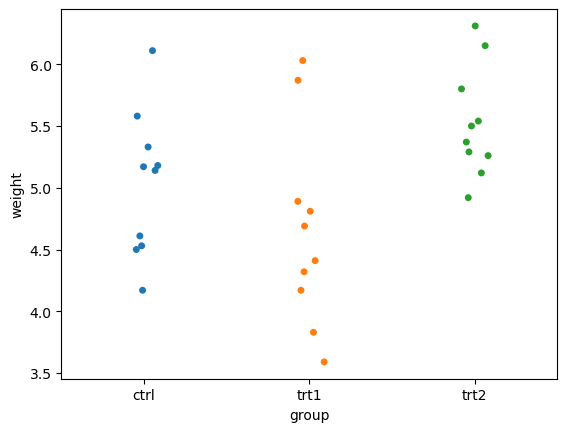

In [18]:
# Plot them on stripplot

sns.stripplot(data=df, x ="group", y="weight", hue="group", legend=False)

Just from looking at the plot above it is difficult to see much of a change from Treatment 1 group in comparison to the control. They both seem to be distributed roughly around the 5g mark. There may be a slight decrease in yield using treatment 1 from this plot but it will need further investigation.

However it is noticeable that treatment 2 group seems to have a higher yield. The values centre around 5.5g with very few samples below 5g.

### T-Test

The [t-statistic](https://www.statisticshowto.com/t-statistic) is a way of measuring if two groups of data are significantly different from each other. In this context we will be looking at the effect of each treatment in comparison to the control.  If it has an affect we would expect a statistically significant difference (either positive or negative), if the difference is small and could be explained by random chance then the t-statistic will be small.

The formula for a paired samples T-test is;

$t = \dfrac{Σ(x_{1}-x_{2})}{\dfrac{s}{\sqrt{n}}}$

where;
- $Σ(x_{1}-x_{2})$ is the difference between the means for sample 1 and sample 2
- $s$ is the standard deviation
- $n$ is the number of values in a sample

First we will calculate the t-test using python and the above formula. However the p-value is also of interest so we will use scipy.stats ttest_rel as well. 

In [19]:
# Convert our dataframes to arrays

ctrl_array = ctrl['weight'].to_numpy()
#ctrl_array

trt1_array = trt1['weight'].to_numpy()
trt1_array

trt2_array = trt2['weight'].to_numpy()
trt2_array

array([6.31, 5.12, 5.54, 5.5 , 5.37, 5.29, 4.92, 6.15, 5.8 , 5.26])

#### Treatment 1 Vs Control

Using the above equation we first need to find the difference of means between the two groups

In [20]:
#calculate the difference between ctrl and trt1

trt1_differences = trt1_array - ctrl_array
trt1_differences

array([ 0.64, -1.41, -0.77, -2.52,  1.37, -0.78,  0.86,  0.36, -1.01,
       -0.45])

In [21]:
#Calculate the mean of the differences

trt1_mean_diff = sum(trt1_differences)/len(trt1_differences)
trt1_mean_diff

-0.371

Next we need the standard deviation or $s$

In [22]:
#calculate standard deviation using numpy

trt1_std = np.std(trt1_differences, ddof=1)
trt1_std

1.1804749514966895

In [23]:
#n is the number of samples

n = len(trt1_differences)
n

10

In [24]:
trt1_t_test = trt1_mean_diff/(trt1_std/np.sqrt(n))
trt1_t_test

-0.9938415130579406

The t-test value is very small indicating that Treatment 1 has had a negative effect on yield.

As the p-value is also of concern ttest_rel will be used to replicate the above

In [ ]:
# scipy t_test

trt1_scipy_t, trt1_pvalue = stats.ttest_rel(trt1_array, ctrl_array)
trt1_scipy_t

-1.1912603818487009

In [26]:
#p-value for treatment 1

trt1_pvalue

0.3462672871440382

Both the python method and the scipy.stats.ttest_rel method have given the same t-test number. The scipy method also calculates the p-value for us. In this case if is 0.346.

The common significance level of t-tests is 0.05. This would mean there is a 5% chance of the results being random chance. In our case the p-value is 0.346, significantly higher that this. It would indicate no statistically significant impact from the two week exercise programme. 

This demonstrates that there is a negative effect on the yield of the plant from treatment 1.

#### Treatment 2 Vs Control

For Treatment 2 we will just use the scipy.stats.ttest_rel method.

In [27]:
# scipy t_test

trt2_scipy_t, trt2_pvalue = stats.ttest_rel(trt2_array, ctrl_array)
trt2_scipy_t

1.772083360883858

In [28]:
#p-value for treatment 2
trt2_pvalue

0.11014394200586315

The t-test value, indicates some difference between the before and after groups, however it is not large enough to be considered statistically significant given the variability in the data.

The null hypothesis here assumes that there is no significant difference between mean values before and after treatment. For evidence to disprove this we would need a p-value of less than 0.05. In this case the p-value is 0.11 which is higher than this threshold.  This isnt very far from 0.05, and could be down to a lack of statistical power. If we were to increase the number of samples, it might help detect smaller effects.

# USed the wrong T-test. do again with an independent test instead of paired


~